# KMeans ve Gaussian Mixture Model ile Kümeleme
Bu kod, veri kümeleme yöntemlerini kullanarak verileri analiz etmeyi ve görselleştirmeyi amaçlamaktadır. İki farklı kümeleme algoritması olan KMeans ve Gaussian Mixture Model (GMM) kullanılarak verilerin nasıl kümelendiğini ve sonuçların nasıl görselleştirildiğini gösterir. İşte bu kodun temel bileşenleri ve işleyişi:

1. Veri Üretimi ve Hazırlığı
Veri Üretimi: İlk olarak, make_blobs fonksiyonu ile 400 örnek içeren, dört farklı merkez etrafında kümelenmiş yapay veri setleri üretilir. Bu veri seti, kümeleme algoritmalarının performansını değerlendirmek için kullanılır.
Veri Gerilmesi: Veriler üzerinde rastgele bir gerilme (stretching) işlemi uygulanır, bu da verilerin daha farklı bir dağılımda görselleştirilmesine olanak sağlar.
2. KMeans Kümeleme
KMeans Algoritması: KMeans algoritması, verileri belirli bir sayıda (bu örnekte 4) kümeye ayırır. Bu işlem, verilerin nasıl gruplandığını anlamak için kullanılır.
Küme Merkezleri: Algoritma sonuçları, her bir küme için merkez noktaları ile birlikte görselleştirilir. Küme merkezleri, kümelerin merkez noktalarını temsil eder ve genellikle büyük kırmızı noktalarla gösterilir.
3. Gaussian Mixture Model (GMM)
GMM Algoritması: GaussianMixture modeli, verileri çok sayıda (bu örnekte 4) Gauss dağılımı ile modellemeye çalışır. Bu, verilerdeki gizli yapıları daha esnek bir şekilde modellemek için kullanılır.
Elipsler ile Görselleştirme: Her bir Gauss bileşeni için, verilerin etrafında elipsler çizilir. Bu elipsler, her bileşenin kovaryansını ve ağırlığını temsil eder. Elipslerin büyüklüğü ve konumu, bileşenin veri üzerindeki etkisini görsel olarak gösterir.
4. Görselleştirme
KMeans ve GMM Sonuçları: Her iki algoritmanın sonuçları iki ayrı grafik üzerinde görselleştirilir:
Orijinal Veriler: İlk grafikte orijinal veri kümesi ve her bir algoritmanın küme merkezleri gösterilir.
Gerilmiş Veriler: İkinci grafikte, gerilmiş veri kümesi üzerinde algoritmaların nasıl çalıştığı ve sonuçların nasıl değiştiği gözlemlenir.
5. Kodun Yapısı ve Kullanımı
Fonksiyonlar: Kod, plot_kmeans, plot_gmm, ve draw_ellipse gibi fonksiyonlar içerir. Bu fonksiyonlar, kümeleri ve elipsleri çizmek için kullanılır ve kodun modülerliğini artırır.
Görselleştirme Ayarları: plt.subplots kullanılarak sonuçlar yan yana iki grafik olarak sunulur. Bu, verilerin ve algoritmaların karşılaştırılmasını kolaylaştırır.
Bu kod, KMeans ve GMM gibi kümeleme algoritmalarının nasıl çalıştığını ve verileri nasıl grupladığını anlamak için güçlü bir görselleştirme aracıdır. Görselleştirilen sonuçlar, algoritmaların farklı veri dağılımlarında nasıl performans gösterdiğini ve çeşitli kümeleme yöntemlerinin sonuçlarını nasıl etkilediğini anlamak için faydalıdır.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from scipy.spatial.distance import cdist

# bazı verileri üretelim
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # Verilerin yönünü değiştiriyoruz

In [9]:
import warnings
import matplotlib as mpl

# sklearn'den gelen uyarıları kapat
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Matplotlib'den gelen uyarıları kapat
mpl.rcParams['axes.titlepad'] = 15  # Yükseltilmiş alanı kontrol etmek için örnek bir ayar

# Özellikle Matplotlib'den gelen DeprecationWarning'leri kapatmak için
warnings.filterwarnings("ignore", category=mpl.MatplotlibDeprecationWarning)

C:\Users\realb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


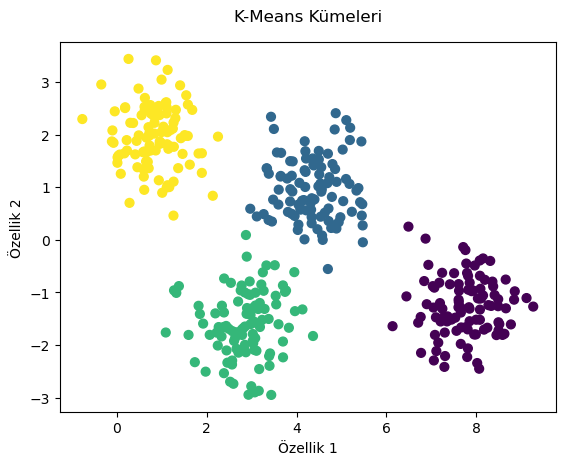

In [10]:
# K-Means algoritmasını kullanarak kümeleri belirleyin
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit(X).predict(X)

# Verileri çizdirin
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title('K-Means Kümeleri')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

C:\Users\realb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


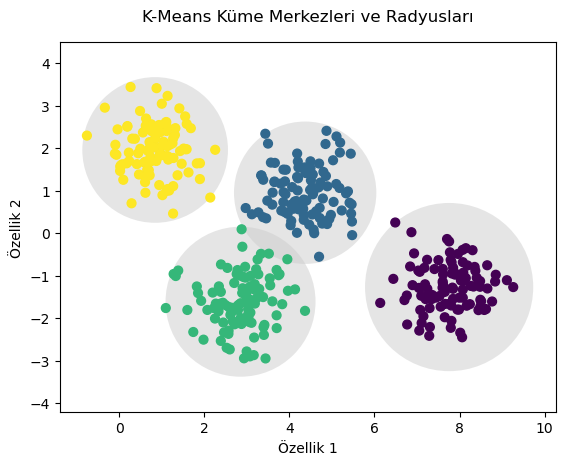

In [11]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # Plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # Plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)
plt.title('K-Means Küme Merkezleri ve Radyusları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

C:\Users\realb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\realb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


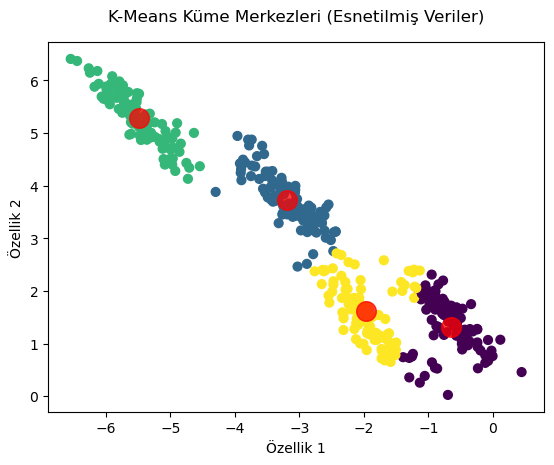

In [12]:
# Verileri esnetmek için rastgele bir matris oluşturun
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

# K-Means algoritmasını kullanarak kümeleri belirleyin
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit(X_stretched).predict(X_stretched)

# K-Means sonuçlarını çizdiren fonksiyon
def plot_kmeans(kmeans, X):
    labels = kmeans.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
    plt.title('K-Means Küme Merkezleri (Esnetilmiş Veriler)')
    plt.xlabel('Özellik 1')
    plt.ylabel('Özellik 2')
    plt.show()

# K-Means sonuçlarını çizdirin
plot_kmeans(kmeans, X_stretched)

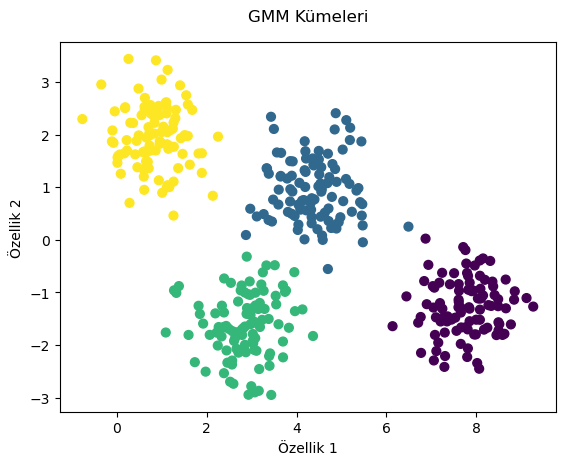

In [13]:
# Gaussian Mixture Model (GMM) kullanarak kümeleri belirleyin
gmm = GaussianMixture(n_components=4, random_state=0).fit(X)
labels = gmm.predict(X)

# Verileri çizdirin
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title('GMM Kümeleri')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

[[0.469 0.531 0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]]


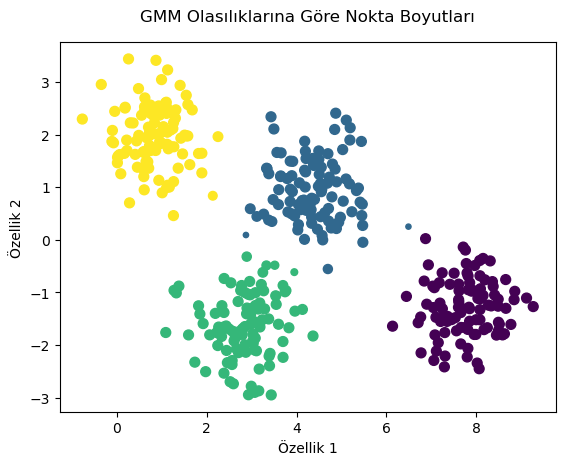

In [14]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))  # İlk 5 olasılığı yazdırın

# Olasılık büyüklüğüne göre nokta boyutlarını ayarlayın
size = 50 * probs.max(1) ** 2  # Square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)
plt.title('GMM Olasılıklarına Göre Nokta Boyutları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

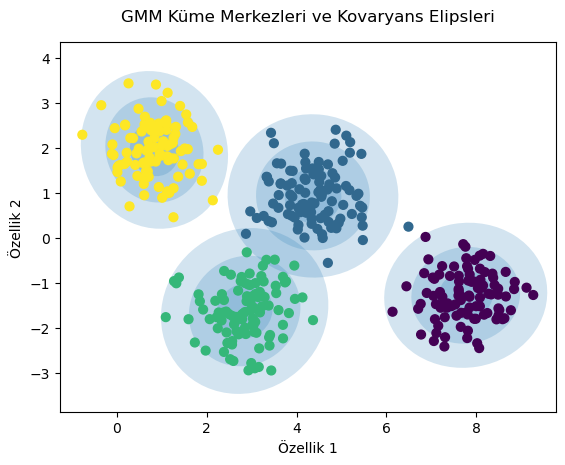

In [15]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Çizim için elips ekleyin"""
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)

# GMM sonuçlarını çizdirin
plot_gmm(gmm, X)
plt.title('GMM Küme Merkezleri ve Kovaryans Elipsleri')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

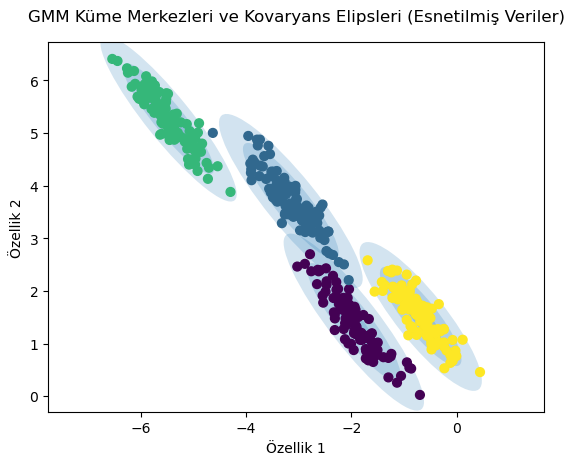

In [16]:
# Gaussian Mixture Model (GMM) kullanarak kümeleri belirleyin
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42).fit(X_stretched)
labels = gmm.predict(X_stretched)

# GMM Elips Çizim Fonksiyonu
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Çizim için elips ekleyin"""
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)

# GMM sonuçlarını çizdirin
plot_gmm(gmm, X_stretched)
plt.title('GMM Küme Merkezleri ve Kovaryans Elipsleri (Esnetilmiş Veriler)')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()